In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import networkx as nx

In [4]:
# Assuming the file is named 'your_file.csv' and located in the mounted drive
con = pd.read_excel("/content/drive/MyDrive/MSSP-607/Modules/Week_10/Connection.xlsx")
infor = pd.read_excel("/content/drive/MyDrive/MSSP-607/Modules/Week_10/Information.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


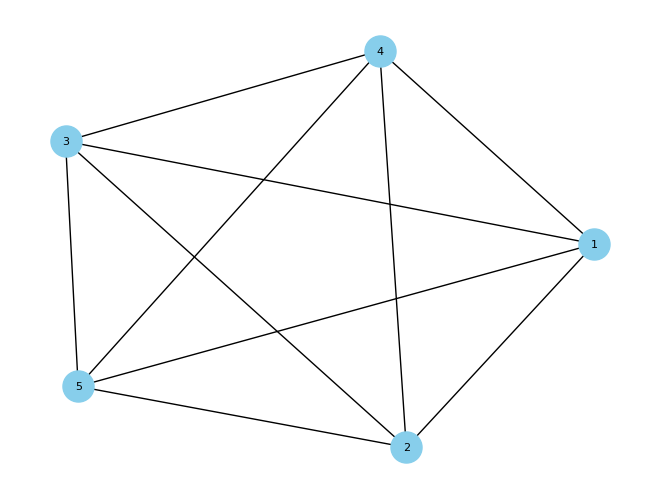

In [5]:
from google.colab import drive
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Assuming the file is named 'your_file.csv' and located in the mounted drive
con = pd.read_excel("/content/drive/MyDrive/MSSP-607/Modules/Week_10/Connection.xlsx")
infor = pd.read_excel("/content/drive/MyDrive/MSSP-607/Modules/Week_10/Information.xlsx")


# Create an empty graph
graph = nx.Graph()

# Add nodes (students) to the graph with demographic attributes
for index, row in infor.iterrows():
  graph.add_node(row['Student_ID'], Age=row['Age'], Gender=row['Gender'], Major=row['Major'])

# Add edges (connections) to the graph
for index, row in con.iterrows():
  graph.add_edge(row['Student_ID_1'], row['Student_ID_2'])

# Draw the graph (you can customize the layout and appearance)
nx.draw(graph, with_labels=True, node_size=500, node_color="skyblue", font_size=8)
plt.show()

In [6]:
# 1. Degree Centrality
degree_centrality = nx.degree_centrality(graph)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
print("Degree Centrality:")
for student_id, centrality in sorted_degree_centrality:
  print(f"Student {student_id}: {centrality}")

# Identify the most connected student(s)
most_connected_student = sorted_degree_centrality[0]
print(f"\nMost connected student: Student {most_connected_student[0]} with centrality {most_connected_student[1]}")

# 2. Clustering Coefficient
clustering_coefficient = nx.clustering(graph)
print("\nClustering Coefficient:")
for student_id, coefficient in clustering_coefficient.items():
  print(f"Student {student_id}: {coefficient}")

# Identify if students have highly interconnected groups (cliques)
# You can analyze the clustering coefficients to see if there are clusters with high values.
# You could also use functions like nx.find_cliques to identify actual cliques.

# 3. Shortest Path Length
shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))
print("\nShortest Path Lengths:")
for source_student in shortest_paths:
  for target_student, length in shortest_paths[source_student].items():
    if source_student != target_student:
      print(f"Shortest path between {source_student} and {target_student}: {length}")


# Find the pair of students who are the furthest apart in the network
max_distance = 0
furthest_students = None
for source_student in shortest_paths:
  for target_student, length in shortest_paths[source_student].items():
    if source_student != target_student and length > max_distance:
      max_distance = length
      furthest_students = (source_student, target_student)

print(f"\nFurthest students apart: {furthest_students} with a distance of {max_distance}")

Degree Centrality:
Student 1: 1.0
Student 2: 1.0
Student 3: 1.0
Student 4: 1.0
Student 5: 1.0

Most connected student: Student 1 with centrality 1.0

Clustering Coefficient:
Student 1: 1.0
Student 2: 1.0
Student 3: 1.0
Student 4: 1.0
Student 5: 1.0

Shortest Path Lengths:
Shortest path between 1 and 2: 1
Shortest path between 1 and 3: 1
Shortest path between 1 and 4: 1
Shortest path between 1 and 5: 1
Shortest path between 2 and 1: 1
Shortest path between 2 and 3: 1
Shortest path between 2 and 4: 1
Shortest path between 2 and 5: 1
Shortest path between 3 and 1: 1
Shortest path between 3 and 2: 1
Shortest path between 3 and 4: 1
Shortest path between 3 and 5: 1
Shortest path between 4 and 1: 1
Shortest path between 4 and 2: 1
Shortest path between 4 and 3: 1
Shortest path between 4 and 5: 1
Shortest path between 5 and 1: 1
Shortest path between 5 and 2: 1
Shortest path between 5 and 3: 1
Shortest path between 5 and 4: 1

Furthest students apart: (1, 2) with a distance of 1
